In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU


In [4]:
df = pd.read_csv('monthly_milk_production.csv')
df.head()


,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [6]:
###convert date column and set index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()


,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


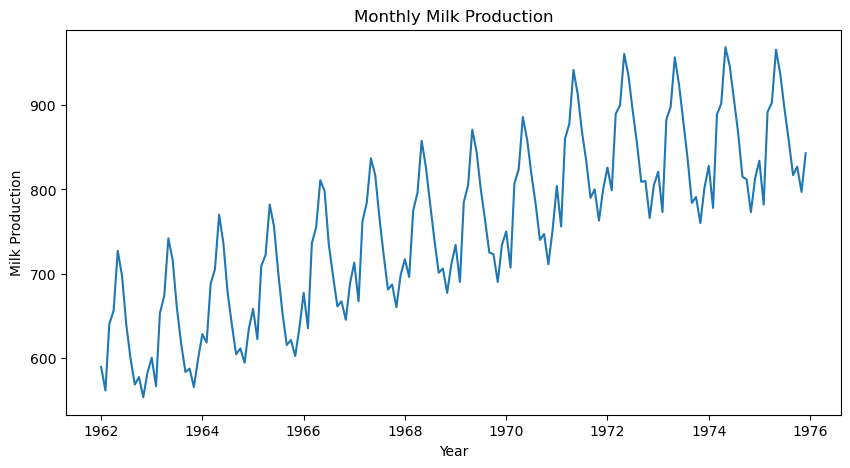

In [7]:
###EDA
plt.figure(figsize=(10,5))
plt.plot(df['Production'])
plt.title('Monthly Milk Production')
plt.xlabel('Year')
plt.ylabel('Milk Production')
plt.show()


In [8]:
###scalling
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df[['Production']])


In [9]:
###Create Sequences
def create_sequences(data, window):
    x, y = [], []
    for i in range(window, len(data)):
        x.append(data[i-window:i])
        y.append(data[i])
    return np.array(x), np.array(y)

WINDOW_SIZE = 12   # 12 months
x, y = create_sequences(scaled_data, WINDOW_SIZE)

x.shape, y.shape


((156, 12, 1), (156, 1))

In [10]:
###train-test-split
train_size = int(0.8 * len(x))

x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [11]:
###basic RNN Model
rnn_model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(x_train.shape[1], 1)),
    Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.summary()


C:\Users\AKSHAT\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
###train RNN
rnn_model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0274 - val_loss: 0.0429
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0093 - val_loss: 0.0086
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0066 - val_loss: 0.0045
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0051 - val_loss: 0.0056
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0041 - val_loss: 0.0055
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0038 - val_loss: 0.0048
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023 - val_loss: 0.0031
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024 - val_loss: 0.0032
Epoch 10/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0020 - val_loss: 0.0041
Epoch 11/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 12/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0017 - val_loss: 0.0034
E

In [15]:
###lstm model
lstm_model = Sequential([
    LSTM(50, activation='tanh', input_shape=(x_train.shape[1], 1)),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()


C:\Users\AKSHAT\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
###train lstm
lstm_model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 0.1518 - val_loss: 0.1967
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0483 - val_loss: 0.0297
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0315 - val_loss: 0.0355
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0300 - val_loss: 0.0280
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0254 - val_loss: 0.0404
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0264 - val_loss: 0.0357
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0247 - val_loss: 0.0288
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0242 - val_loss: 0.0269
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0240 - val_loss: 0.0271
Epoch 10/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0236 - val_loss: 0.0281
Epoch 11/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0233 - val_loss: 0.0277
Epoch 12/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0230 - val_loss: 0.0268


In [18]:
###GRU MODEL
gru_model = Sequential([
    GRU(50, activation='tanh', input_shape=(x_train.shape[1], 1)),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse')
gru_model.summary()


C:\Users\AKSHAT\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 50)                  │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,001 (31.25 KB)

 Trainable params: 8,001 (31.25 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
###train
gru_model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - loss: 0.2226 - val_loss: 0.3719
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0909 - val_loss: 0.1294
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0306 - val_loss: 0.0360
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0308 - val_loss: 0.0243
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0313 - val_loss: 0.0312
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0259 - val_loss: 0.0468
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0248 - val_loss: 0.0510
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0247 - val_loss: 0.0466
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0235 - val_loss: 0.0408
Epoch 10/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0229 - val_loss: 0.0335
Epoch 11/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0224 - val_loss: 0.0332
Epoch 12/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0217 - val_loss: 0.0333


In [21]:
###prediction
rnn_pred  = rnn_model.predict(x_test)
lstm_pred = lstm_model.predict(x_test)
gru_pred  = gru_model.predict(x_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


In [22]:
###inverse scalling
y_test_inv  = scaler.inverse_transform(y_test)
rnn_inv  = scaler.inverse_transform(rnn_pred)
lstm_inv = scaler.inverse_transform(lstm_pred)
gru_inv  = scaler.inverse_transform(gru_pred)


In [23]:
###evaluation metrics
def metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

print("RNN :",  metrics(y_test_inv, rnn_inv))
print("LSTM:", metrics(y_test_inv, lstm_inv))
print("GRU :",  metrics(y_test_inv, gru_inv))


RNN : (np.float64(17.56924342255522), 14.574079513549794, np.float64(1.723227968024967))
LSTM: (np.float64(50.98302397684617), 44.17002487182617, np.float64(5.250019244452637))
GRU : (np.float64(58.73899287217283), 44.27427673339844, np.float64(4.979348452428275))


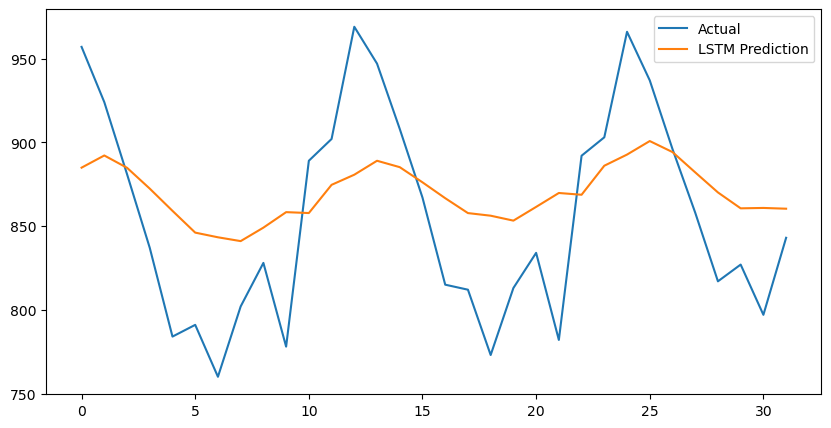

In [24]:
###Actual vs Predicted Plot (LSTM)
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label='Actual')
plt.plot(lstm_inv, label='LSTM Prediction')
plt.legend()
plt.show()


In [25]:
###orecast NEXT 12 MONTHS
last_window = scaled_data[-WINDOW_SIZE:]
future = []

for _ in range(12):
    pred = lstm_model.predict(last_window.reshape(1, WINDOW_SIZE, 1))
    future.append(pred[0,0])
    last_window = np.vstack([last_window[1:], pred])

future = scaler.inverse_transform(np.array(future).reshape(-1,1))
future


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[870.79895],
       [881.8621 ],
       [895.87695],
       [900.3838 ],
       [901.47064],
       [894.6341 ],
       [887.3607 ],
       [882.57983],
       [881.493  ],
       [885.3097 ],
       [889.9908 ],
       [898.5801 ]], dtype=float32)